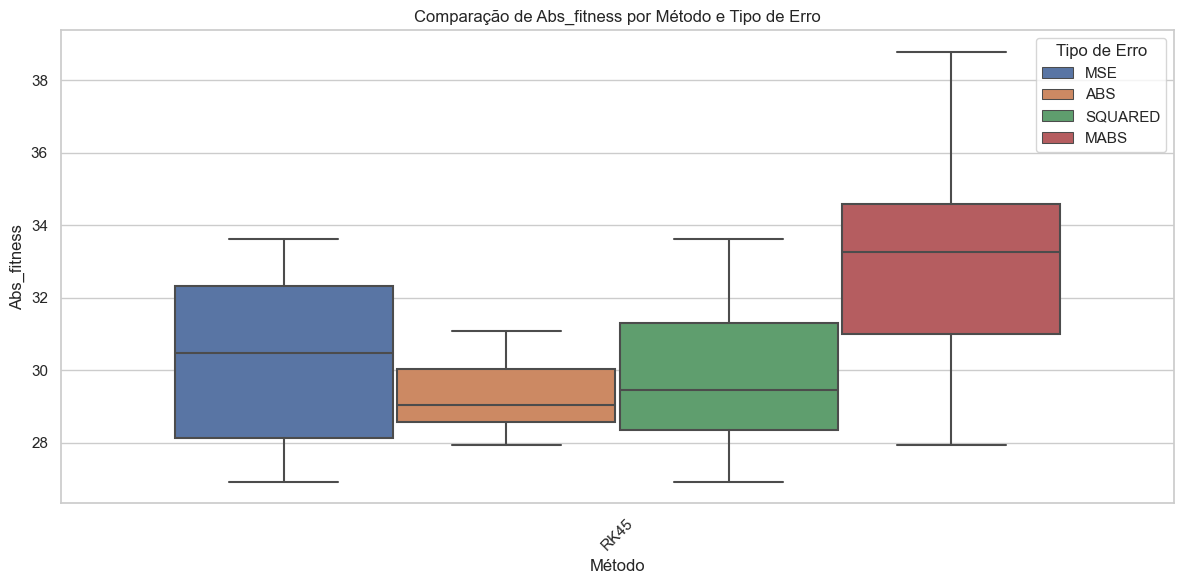

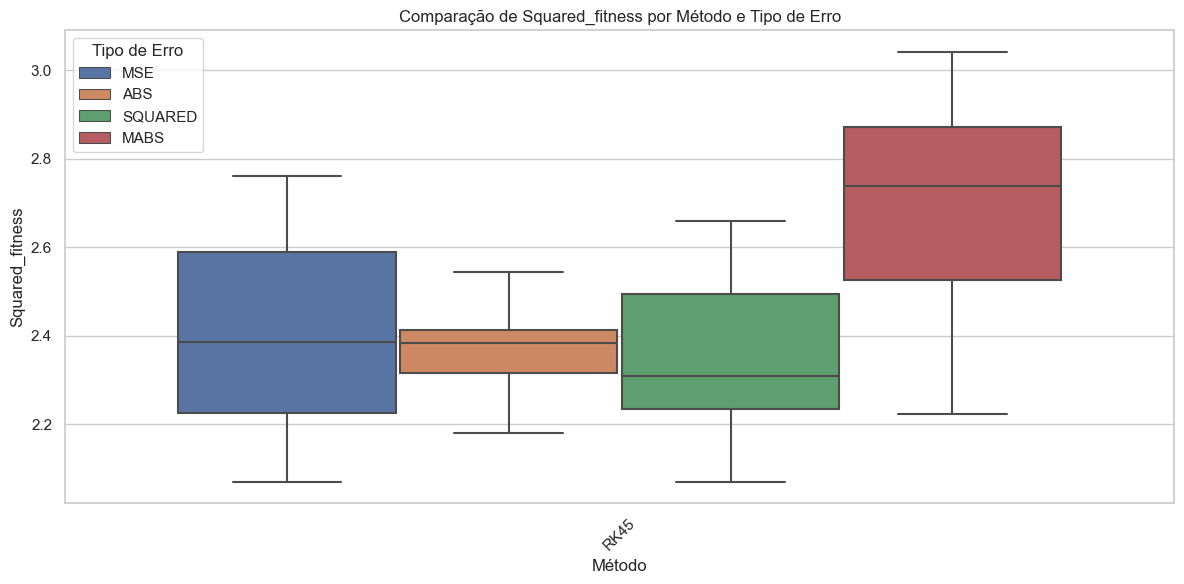

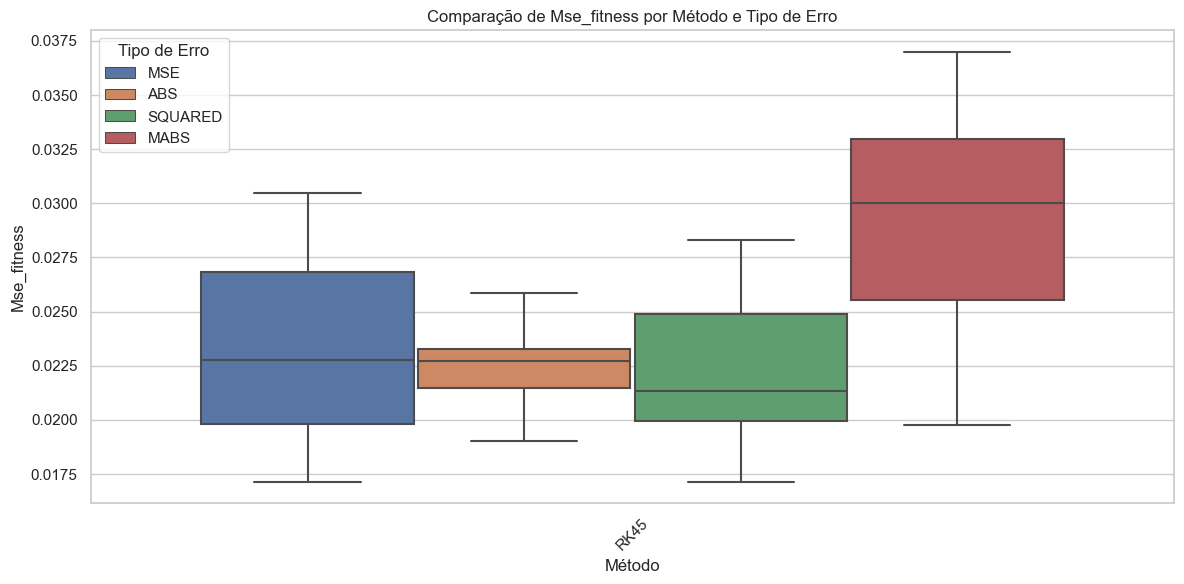

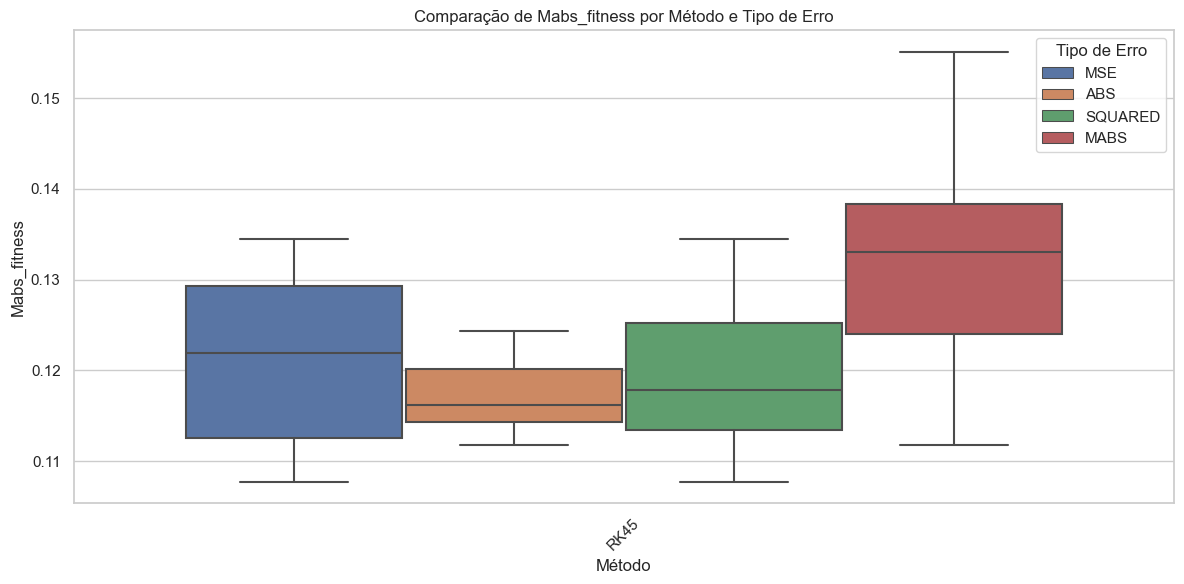

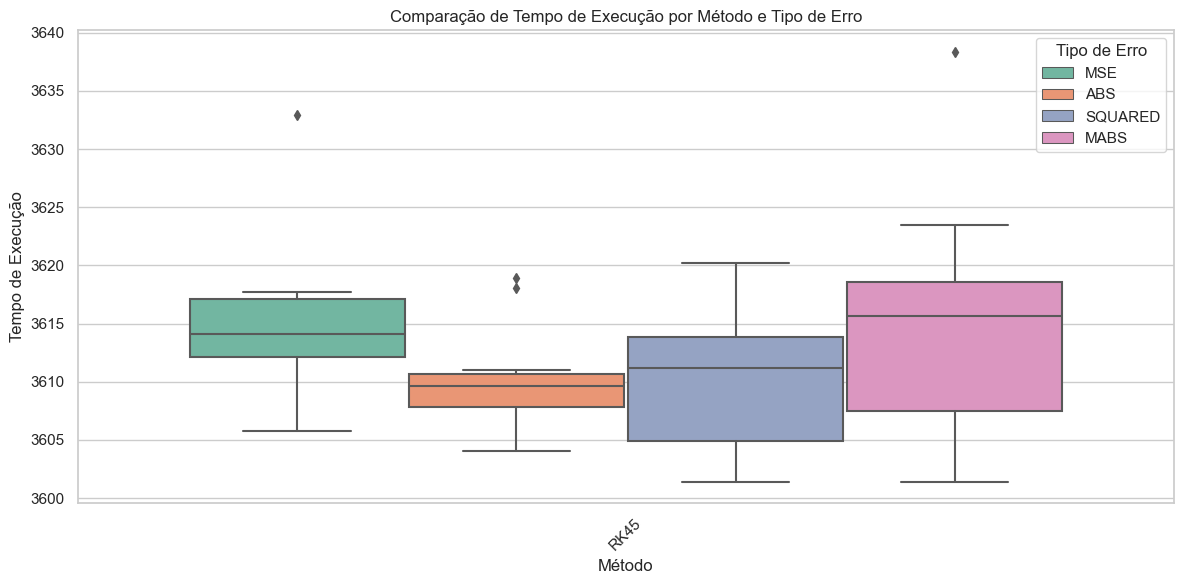

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o arquivo CSV
file_path = './results-de.csv'
data = pd.read_csv(file_path)

# Validar se as colunas esperadas estão presentes
expected_columns = [
    'best_ind', 'error_type', 'method', 'seed', 'ABS_Fitness', 
    'SQUARED_Fitness', 'MSE_Fitness', 'MABS_Fitness', 'execution_time'
]

if not set(expected_columns).issubset(data.columns):
    raise ValueError(f"O arquivo CSV deve conter as colunas: {expected_columns}")

# # Contar duplicatas antes de removê-las
# duplicates = data[data.duplicated(keep=False)]  # Obtém todas as duplicatas
# duplicate_counts = duplicates['method'].value_counts()  # Conta por método

# # Exibir quais métodos têm mais registros duplicados
# if not duplicate_counts.empty:
#     print("Métodos com mais registros duplicados:")
#     print(duplicate_counts)
# else:
#     print("Nenhum dado duplicado encontrado.")

# # Remover dados duplicados (considerando todos os valores iguais)
# data = data.drop_duplicates()

# Criar gráficos comparativos para boxplots
sns.set_theme(style="whitegrid")
metrics = ['ABS_Fitness', 'SQUARED_Fitness', 'MSE_Fitness', 'MABS_Fitness']

for metric in metrics:
    plt.figure(figsize=(12, 6))
    sns.boxplot(
        data=data, 
        x='method', 
        y=metric, 
        hue='error_type',
        showfliers=True  # Exibir outliers
    )
    plt.title(f'Comparação de {metric.capitalize()} por Método e Tipo de Erro')
    plt.xlabel('Método')
    plt.ylabel(f'{metric.capitalize()}')
    plt.legend(title='Tipo de Erro')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
# Criar gráficos comparativos para boxplots de tempo de execução com cores diferentes
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=data, 
    x='method', 
    y='execution_time', 
    hue='error_type',
    showfliers=True,  # Exibir outliers
    palette="Set2"  # Usar paleta de cores diferente
)
plt.title(f'Comparação de Tempo de Execução por Método e Tipo de Erro')
plt.xlabel('Método')
plt.ylabel('Tempo de Execução')
plt.legend(title='Tipo de Erro')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [2]:
# Agrupar por método e tipo de erro e calcular estatísticas
results = data.groupby(['method', 'error_type']).agg({
    'ABS_Fitness': ['mean', 'std', 'max', 'min'],
    'SQUARED_Fitness': ['mean', 'std', 'max', 'min'],
    'MSE_Fitness': ['mean', 'std', 'max', 'min'],
    'MABS_Fitness': ['mean', 'std', 'max', 'min'],
    'execution_time': 'mean'
}).reset_index()

# Renomear as colunas para facilitar
results.columns = ['method', 'error_type'] + [
    f"{metric}_{stat}" for metric in ['ABS_Fitness', 'SQUARED_Fitness', 'MSE_Fitness', 'MABS_Fitness']
    for stat in ['mean', 'std', 'max', 'min']
] + ['execution_time_mean']

# Salvar os resultados em um arquivo CSV (opcional)
results.to_csv('GRN5-DE_statistics.csv', index=False)

metrics = ['ABS_Fitness', 'SQUARED_Fitness', 'MSE_Fitness', 'MABS_Fitness']
statistics = ['mean', 'std', 'min'] 

for metric in metrics:
    for stat in statistics:
        print(results['method'].iloc[0])
        print(results[f"{metric}_{stat}"])


RK45
0    29.332318
1    33.030958
2    30.353896
3    29.973493
Name: ABS_Fitness_mean, dtype: float64
RK45
0    1.057379
1    3.042137
2    2.445750
3    2.314692
Name: ABS_Fitness_std, dtype: float64
RK45
0    27.937988
1    27.937988
2    26.927827
3    26.927827
Name: ABS_Fitness_min, dtype: float64
RK45
0    2.361904
1    2.676256
2    2.395611
3    2.343356
Name: SQUARED_Fitness_mean, dtype: float64
RK45
0    0.105568
1    0.270748
2    0.240158
3    0.203854
Name: SQUARED_Fitness_std, dtype: float64
RK45
0    2.181223
1    2.222707
2    2.070346
3    2.070346
Name: SQUARED_Fitness_min, dtype: float64
RK45
0    0.022354
1    0.028913
2    0.023163
3    0.022115
Name: MSE_Fitness_mean, dtype: float64
RK45
0    0.001987
1    0.005706
2    0.004622
3    0.003864
Name: MSE_Fitness_std, dtype: float64
RK45
0    0.019031
1    0.019762
2    0.017145
3    0.017145
Name: MSE_Fitness_min, dtype: float64
RK45
0    0.117329
1    0.132124
2    0.121416
3    0.119894
Name: MABS_Fitness_mean, 